In [2]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [3]:
#f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_onlyAboveThresholdClusters.root")
#f = r.TFile("./data/results_9files_truncationComparison.root")
#f = r.TFile("./data/gm2offline_ana_sameClustering.root")
f = r.TFile("./data/results_10MissingOutputFiles_9day_histOnly.root")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	farlineTrunc;1	farlineTrunc (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


# Notebook to check whether there is any early to late effect in the number of clusters by energy

---

### Lets first grab Aarons clustering

In [7]:
f_full = r.TFile("../fitting/PileupScanCorrected_2D_Full.root")
f_full.ls()
c1 = f_full.Get("c1_n2")
print([x for x in c1.GetListOfPrimitives()])

clusters = c1.GetPrimitive("hi").Clone("clusters")
clusters.SetDirectory(0)

[<ROOT.TFrame object ("TFrame") at 0x7fffd08fe2f0>, <ROOT.TH2D object ("hi") at 0x7fffd3631f70>, <ROOT.TPaveText object ("title") at 0x7fffd08fd7e0>]
TFile**		../fitting/PileupScanCorrected_2D_Full.root	
 TFile*		../fitting/PileupScanCorrected_2D_Full.root	
  KEY: TCanvas	c1_n2;1	c1_n2


In [9]:
f_trunc = r.TFile("../fitting/PileupScanCorrected_2D_Trunc.root")
f_trunc.ls()
c2 = f_trunc.Get("c1_n3")
print([x for x in c2.GetListOfPrimitives()])

clustersTrunc = c2.GetPrimitive("hi").Clone("clustersTrunc")
clustersTrunc.SetDirectory(0)

[<ROOT.TFrame object ("TFrame") at 0x7fffd364e070>, <ROOT.TH2D object ("hi") at 0x7fffd3644fa0>, <ROOT.TPaveText object ("title") at 0x7fffd364e840>]
TFile**		../fitting/PileupScanCorrected_2D_Trunc.root	
 TFile*		../fitting/PileupScanCorrected_2D_Trunc.root	
  KEY: TCanvas	c1_n3;1	c1_n3


---

### Now lets break this up into energy divisions

In [10]:
energyBin = 50
minE = 0
maxE = 6000
rebinFactor = 1
#sumw2 = False
sumw2 = True

#times for fitting
tmin = 20
tmax = 650

caloMin = 0
caloMax = 25

In [11]:
energies = [x for x in range(minE, maxE+1, energyBin)]
Nbins = len(energies)
print(energies)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000]


In [12]:
c = r.TCanvas("c","c",5000,5000)
width = 5
height = int(np.ceil(Nbins / width))
c.Divide(width, height)

In [13]:
energyBinHists = []
for i in range(len(energies) - 1):
    e1 = energies[i]
    e2 = energies[i+1]
    #print(e1,e2)
    clusters.GetYaxis().SetRangeUser(e1,e2)
    #caloBinMin = clusters.GetZaxis().FindBin(caloMin)
    #caloBinMax = clusters.GetZaxis().FindBin(caloMax)
    #clusters.GetZaxis().SetRange(caloBinMin, caloBinMax)
    #clusteri = clusters.Project3D("x").Clone("cluster_"+str(i))
    clusteri = clusters.ProjectionX("", 
                                    clusters.GetYaxis().FindBin(e1), 
                                    clusters.GetYaxis().FindBin(e2) ).Clone("cluster_"+str(i))
    clusteri.SetTitle("Full Clusters in Energy Range: "+str(e1)+" - "+str(e2)+" MeV")
    clusteri.Rebin(rebinFactor)
    
    clustersTrunc.GetYaxis().SetRangeUser(e1,e2)
    #clustersTrunc.GetZaxis().SetRange(caloBinMin, caloBinMax)
    #clusterTrunci = clustersTrunc.Project3D("x").Clone("clusterTrunc_"+str(i))
    clusterTrunci = clustersTrunc.ProjectionX("", 
                                              clustersTrunc.GetYaxis().FindBin(e1), 
                                              clustersTrunc.GetYaxis().FindBin(e2) ).Clone("clusterTrunc_"+str(i))
    clusterTrunci.SetTitle("Truncated Clusters in Energy Range: "+str(e1)+" - "+str(e2)+" MeV")
    clusterTrunci.SetLineColor(2)
    clusterTrunci.Rebin(rebinFactor)
    if(sumw2):
        clusteri.Sumw2()
        clusterTrunci.Sumw2()
    
    energyBinHists.append( (clusteri, clusterTrunci) )

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure al

In [15]:
for i, (ci, cti) in enumerate(energyBinHists):
    #print(i, ci)
    c.cd(i+1)
    ci.Draw("hist e")
    cti.Draw("SAME hist e")
    r.gPad.SetLogy()

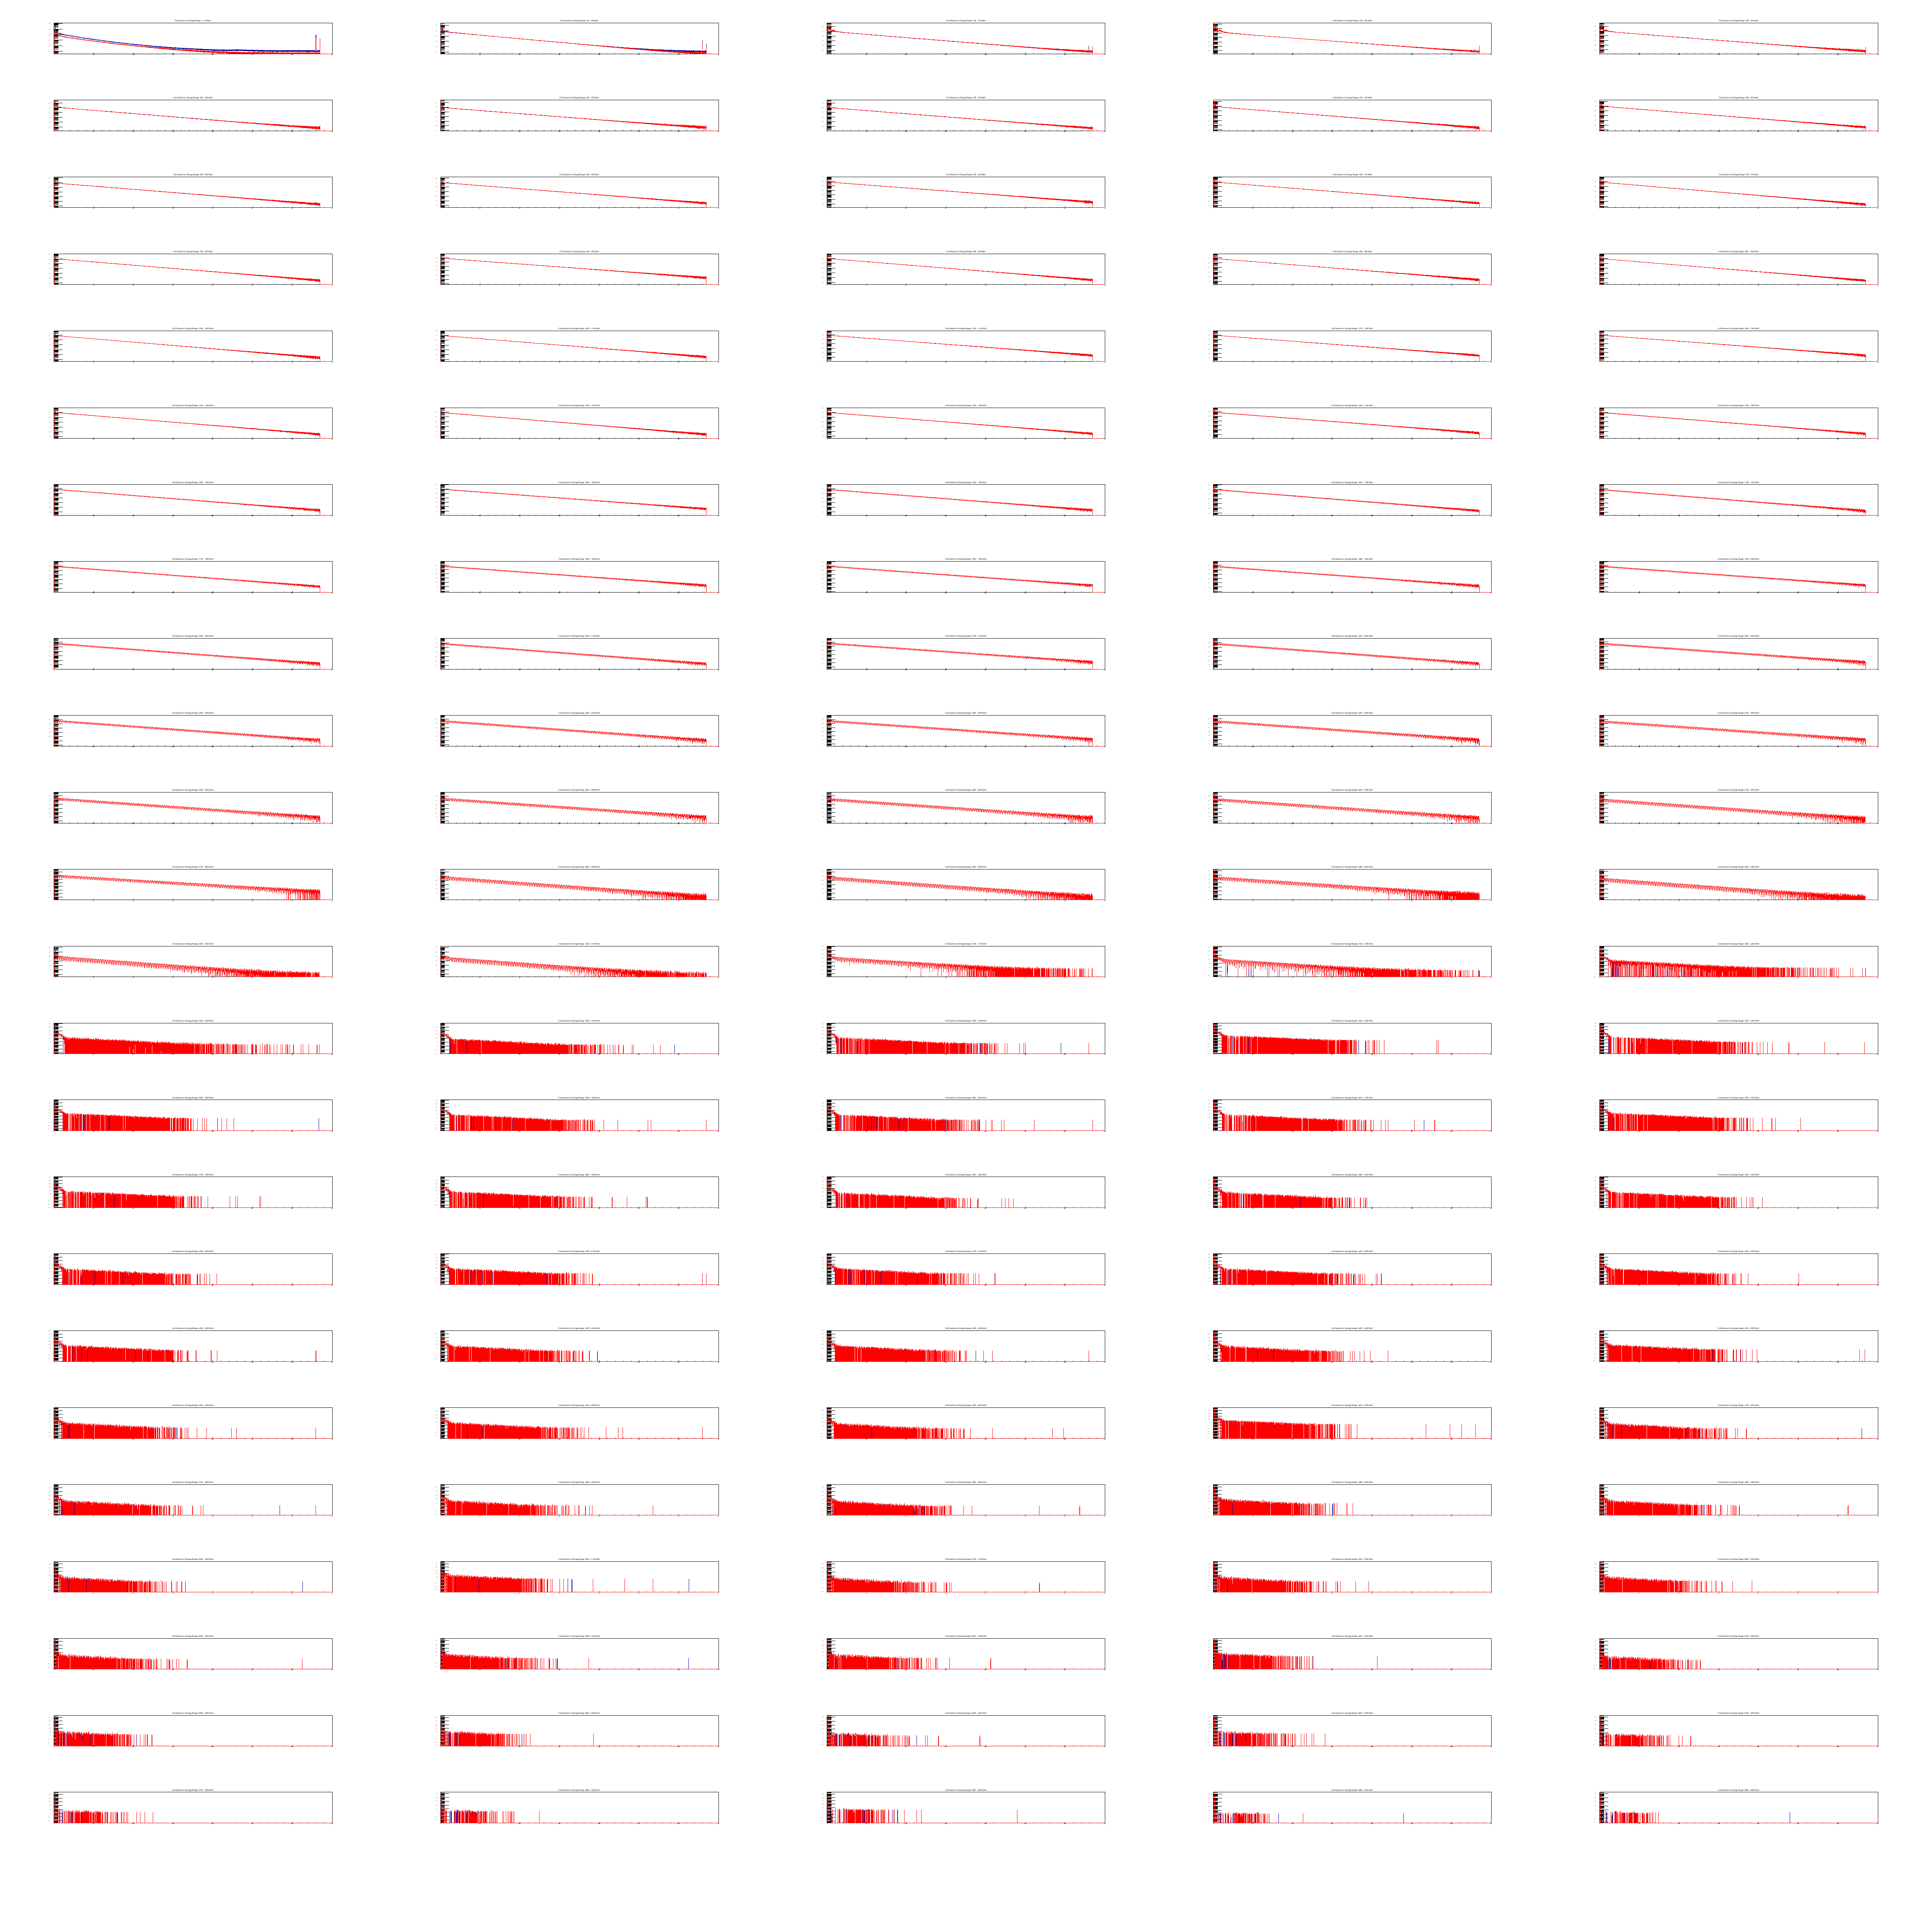

In [16]:
c.Draw()

In [17]:
energyDiffHists = []
for i, (ci, cti) in enumerate(energyBinHists):
    edi = ci.Clone("clusterDiff_"+str(i))
    edi.SetTitle("Difference in Clusters: Full - Trunc")
    edi.Add(cti, -1)
    energyDiffHists.append(edi)

In [19]:
energyDiffInverseHists = []
for edi in energyDiffHists:
    edinv = edi.Clone()
    for i in range(edinv.GetNbinsX() + 1):
        edinv.SetBinContent(i, edinv.GetBinContent(i)*-1)
    edinv.SetLineColor(2)
    energyDiffInverseHists.append(edinv)

In [20]:
for i, edi in enumerate(energyDiffHists):
    #print(i, ci)
    c.cd(i+1)
    edi.Draw("hist e")
    energyDiffInverseHists[i].Draw("SAME hist e")
    r.gPad.SetLogy()
    
leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(edi,"Full","l")
leg.AddEntry(energyDiffInverseHists[i],"Truncated","l")
leg.Draw()

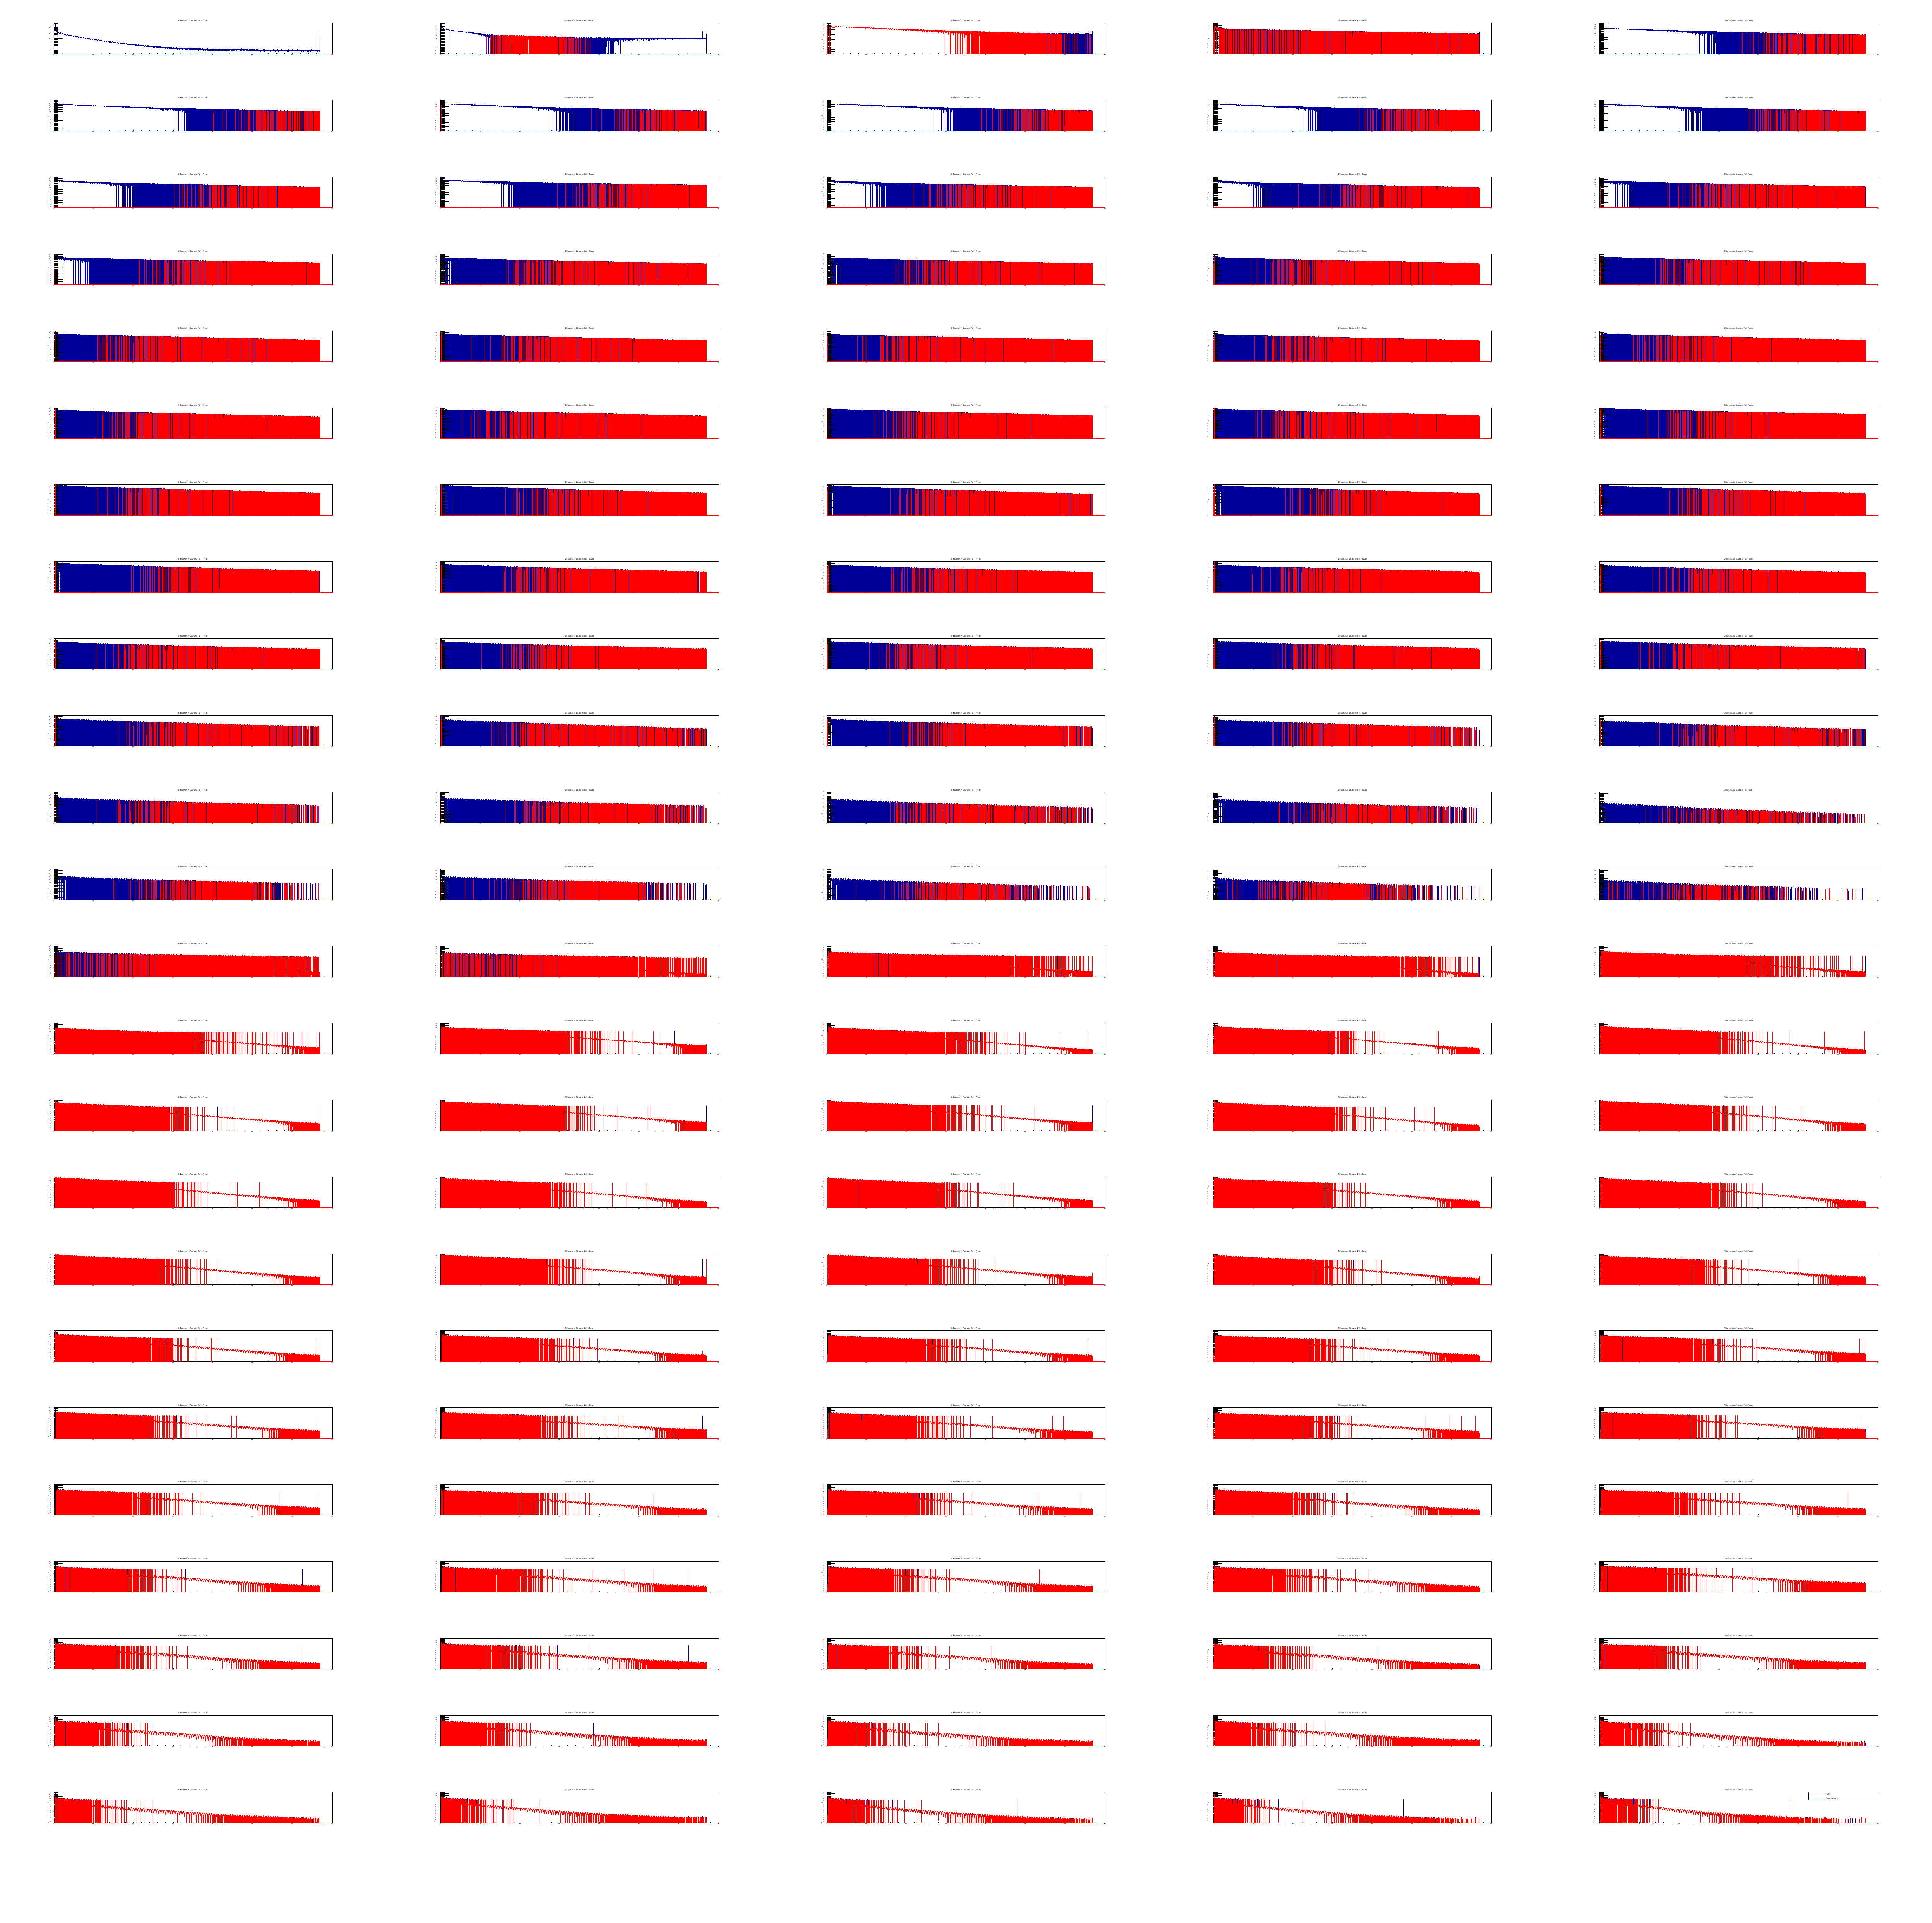

In [21]:
c.Draw()

---

### And now the ratio

In [22]:
energyRatioHists = []
for i, edi in enumerate(energyDiffHists):
    eri = edi.Clone()
    e1 = energies[i]
    e2 = energies[i+1]
    eri.SetTitle("Clusters (Full - Trunc) / Full in Energy Range: "+str(e1)+" - "+str(e2)+" MeV")
    eri.Divide( energyBinHists[i][0] )
    energyRatioHists.append( eri )

In [23]:
energyRatioInverseHists = []
for eri in energyRatioHists:
    erinv = eri.Clone()
    for i in range(erinv.GetNbinsX() + 1):
        erinv.SetBinContent(i, erinv.GetBinContent(i)*-1)
    erinv.SetLineColor(2)
    energyRatioInverseHists.append(erinv)

In [24]:
linFit = r.TF1("linFit","pol1",tmin,tmax)

In [25]:
ratioFits = []
ratioErrs = []
for i, eri in enumerate(energyRatioHists):
    #print(i, ci)
    c.cd(i+1)
    eri.Draw("hist ")
    #eri.GetXaxis().SetRangeUser(400,450)
    eri.Fit("linFit","REMBQ")
    ratioFits.append( ( linFit.GetParameter(0),linFit.GetParameter(1) ) )
    ratioErrs.append( ( linFit.GetParError(0),linFit.GetParError(1) ) )
    #energyRatioInverseHists[i].Draw("SAME hist e")
    r.gPad.SetLogy(0)

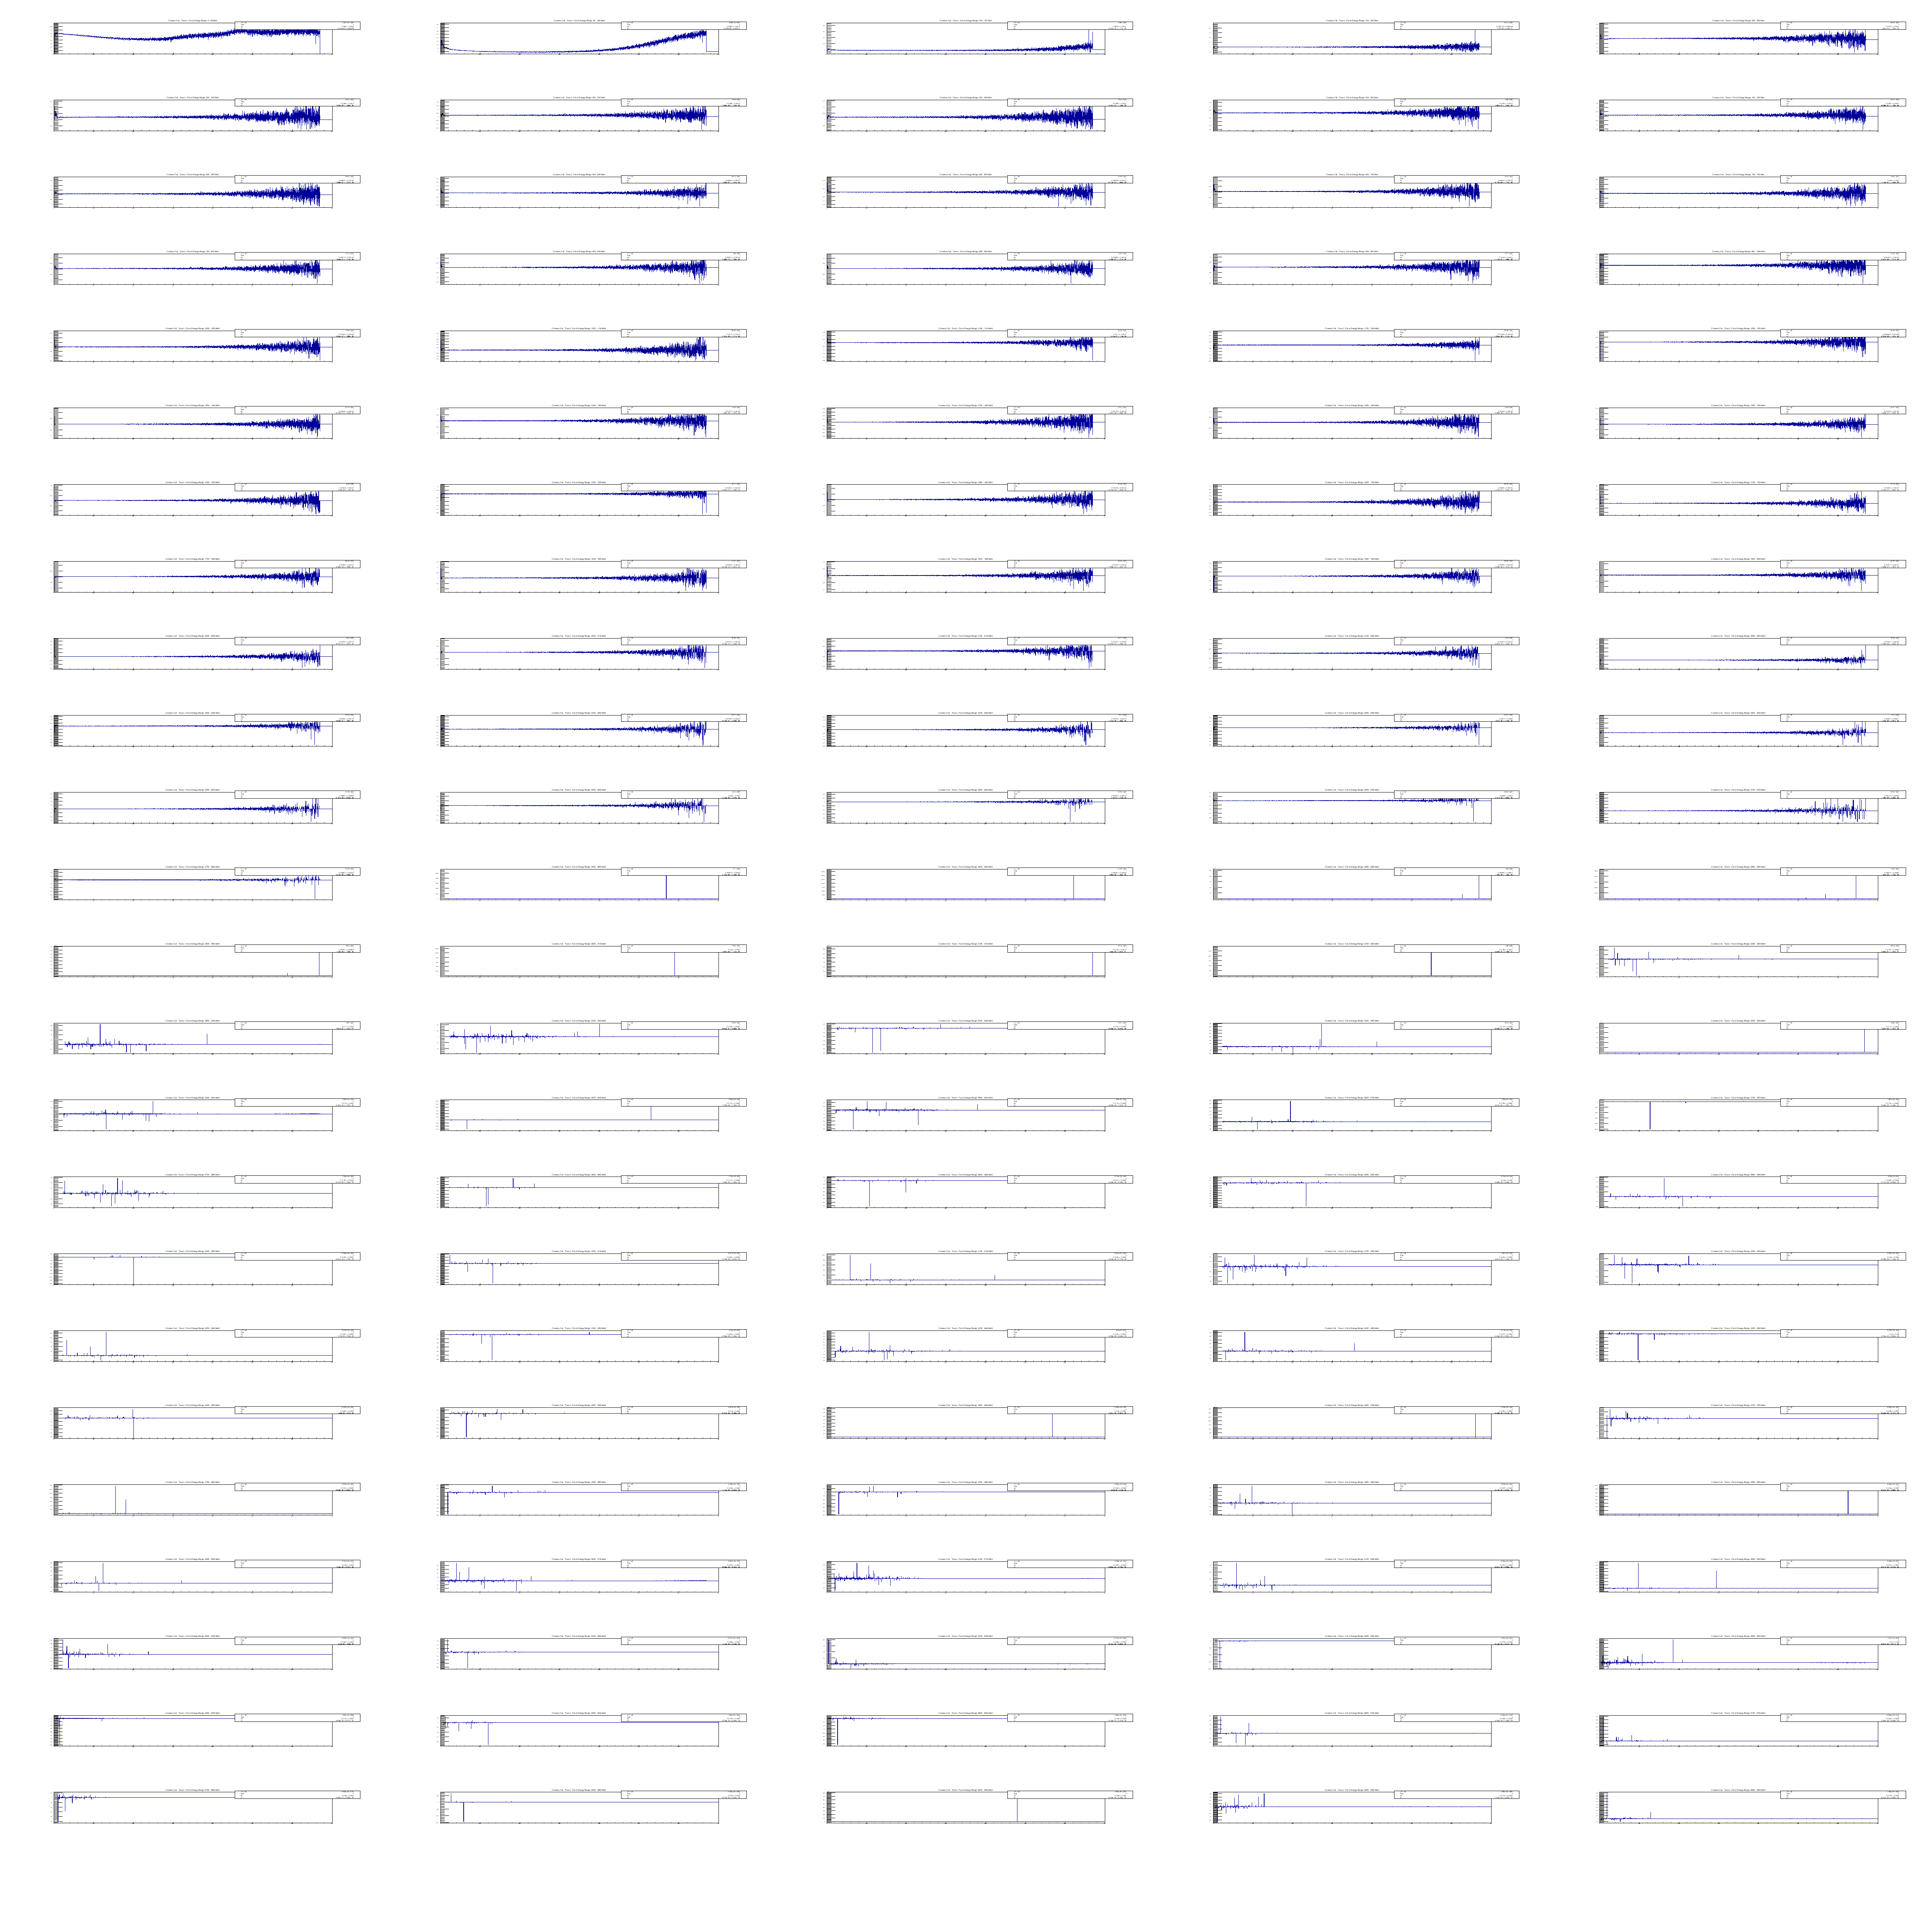

In [26]:
c.Draw()

---

### And now lets plot the results

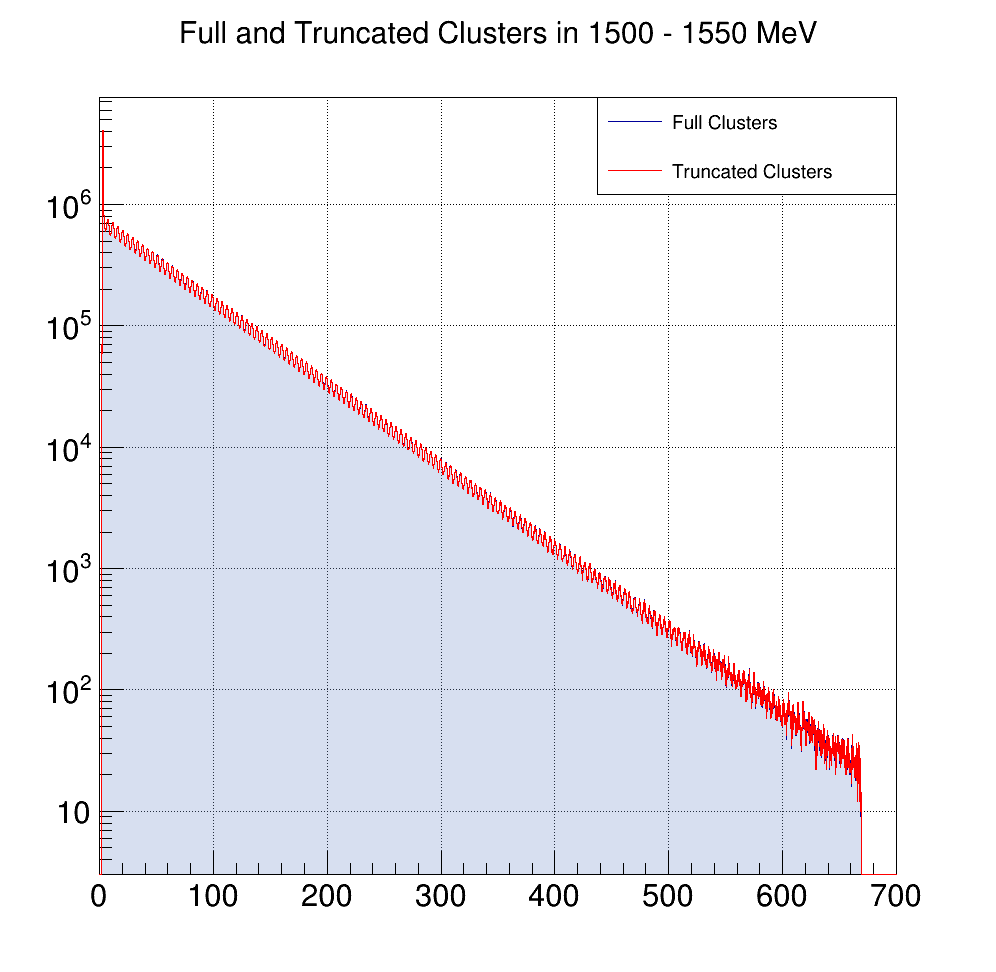

In [27]:
c = r.TCanvas("C","c",1000,1000)
energyBin = 30
energyBinHists[energyBin][0].SetTitle("Full and Truncated Clusters in "+str(energies[energyBin])+" - "+str(energies[energyBin+1])+" MeV")
energyBinHists[energyBin][0].Draw("hist")
energyBinHists[energyBin][1].Draw("hist same")
energyBinHists[energyBin][0].SetFillColorAlpha(38,0.3)
c.SetLogy()
c.SetGrid()

leg = r.TLegend(0.6,0.8,0.9,0.9)
leg.AddEntry(energyBinHists[energyBin][0], "Full Clusters", "al")
leg.AddEntry(energyBinHists[energyBin][1], "Truncated Clusters", "al")
leg.Draw()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: C


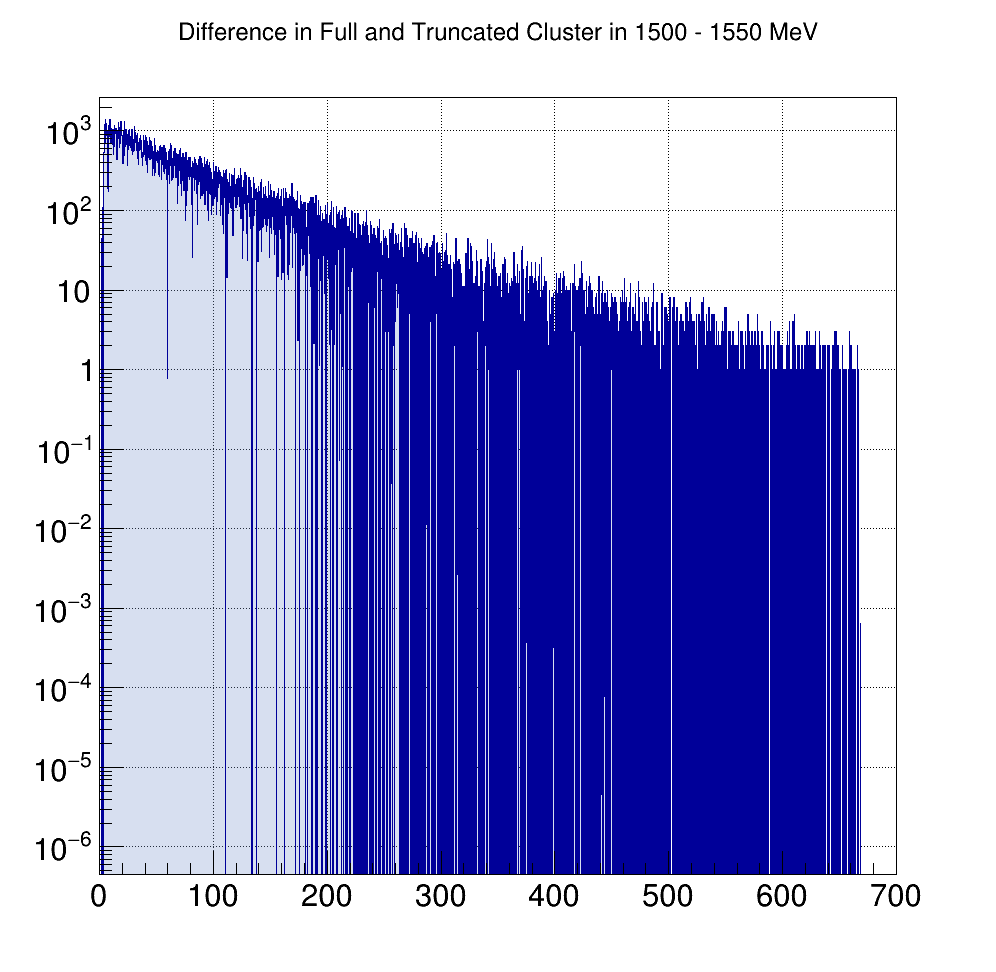

In [28]:
c = r.TCanvas("C","c",1000,1000)
energyBin = 30
energyDiffHists[energyBin].SetTitle("Difference in Full and Truncated Cluster in "+str(energies[energyBin])+" - "+str(energies[energyBin+1])+" MeV")
energyDiffHists[energyBin].Draw("hist")
energyDiffHists[energyBin].SetFillColorAlpha(38,0.3)
c.SetLogy()
c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: C


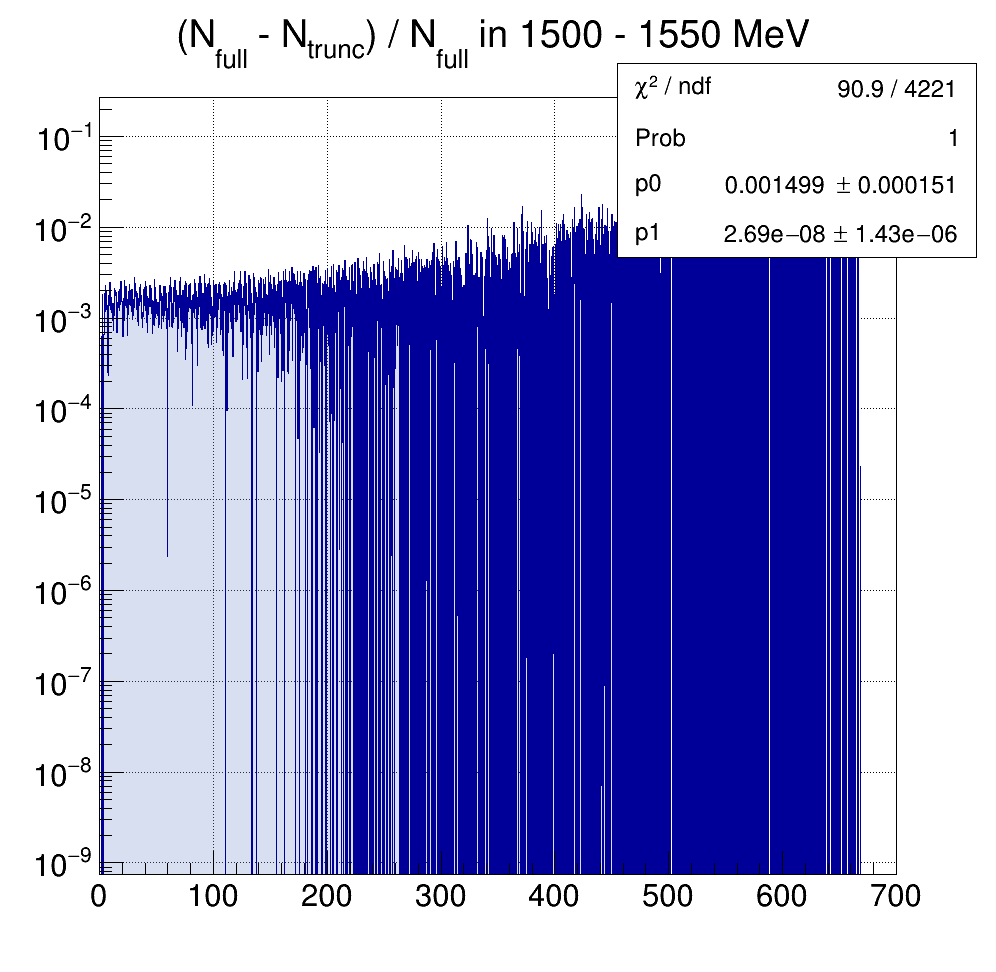

In [29]:
c = r.TCanvas("C","c",1000,1000)
energyBin = 30
energyRatioHists[energyBin].SetTitle("(N_{full} - N_{trunc}) / N_{full} in "+str(energies[energyBin])+" - "+str(energies[energyBin+1])+" MeV")
energyRatioHists[energyBin].Draw("hist")
energyRatioHists[energyBin].SetFillColorAlpha(38,0.3)
c.SetLogy()
c.SetGrid()
c.Draw()

In [30]:
p0s,p1s = zip(*ratioFits)
p0es,p1es = zip(*ratioErrs)

In [31]:
print([x for x in zip(energies, p1s)])

[(0, -0.00034987590592197625), (50, -0.0002588934584483041), (100, -2.7440131811691168e-05), (150, 4.270116049212867e-06), (200, 1.6526235652822658e-05), (250, 7.676191897830938e-06), (300, 2.592503333842377e-06), (350, 9.237210460210653e-07), (400, 7.692349287053589e-07), (450, -6.398918052809729e-07), (500, -1.507835990093595e-07), (550, -1.383047152435536e-07), (600, -5.17566483967672e-07), (650, -9.175257863838866e-08), (700, -1.175116914505384e-07), (750, -1.552744049788456e-07), (800, 4.3953684878236837e-10), (850, -2.7363369142294106e-07), (900, -1.712943680252785e-07), (950, 5.467248347792109e-08), (1000, 2.6444270623446505e-07), (1050, 2.491171721236115e-08), (1100, -2.2498501609570128e-07), (1150, -7.894039646783927e-08), (1200, 9.319306437081723e-08), (1250, -2.17499624062246e-07), (1300, 1.5422713103013536e-08), (1350, 1.4806689416017762e-08), (1400, 9.507534736895255e-08), (1450, -1.6585954790012362e-07), (1500, 2.690054646933003e-08), (1550, 2.5551775207851635e-07), (1600

<>:3: DeprecationWarning: invalid escape sequence \m


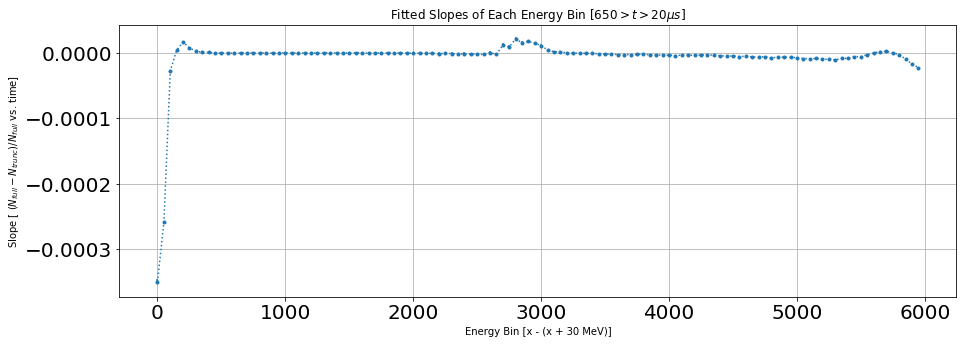

In [32]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(energies[:-1],p1s,yerr=p1es,fmt='.:')
plt.title(r"Fitted Slopes of Each Energy Bin [$"+str(tmax)+" > t > "+str(tmin)+" \mu s$]")
plt.xlabel("Energy Bin [x - (x + "+str(energyBin)+" MeV)]")
plt.ylabel(r"Slope [ $( N_{full} - N_{trunc} ) / N_{full}$ vs. time]")
#plt.ylim(-0.0001,0.0001)
plt.grid()
plt.show()

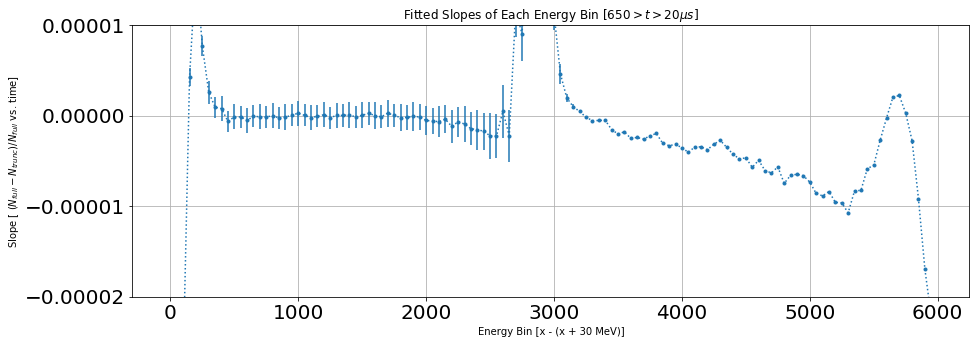

In [33]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(energies[:-1],p1s,yerr=p1es,fmt='.:')
plt.title(r"Fitted Slopes of Each Energy Bin [$"+str(tmax)+" > t > "+str(tmin)+" \mu s$]")
plt.xlabel("Energy Bin [x - (x + "+str(energyBin)+" MeV)]")
plt.ylabel(r"Slope [ $( N_{full} - N_{trunc} ) / N_{full}$ vs. time]")
plt.ylim(-0.00002,0.00001)
#plt.xlim(1000,3100)
plt.grid()
plt.show()

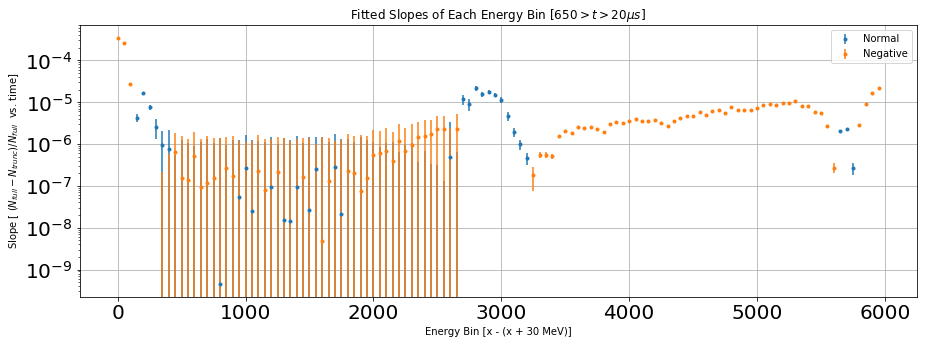

In [34]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(energies[:-1],p1s,yerr=p1es,fmt='.',label="Normal")
plt.errorbar(energies[:-1],[x*-1 for x in p1s],yerr=p1es,fmt='.',label="Negative")

plt.title(r"Fitted Slopes of Each Energy Bin [$"+str(tmax)+" > t > "+str(tmin)+" \mu s$]")
plt.xlabel("Energy Bin [x - (x + "+str(energyBin)+" MeV)]")
plt.ylabel(r"Slope [ $( N_{full} - N_{trunc} ) / N_{full}$  vs. time]")
#plt.ylim(-0.000051,0.000051)
plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

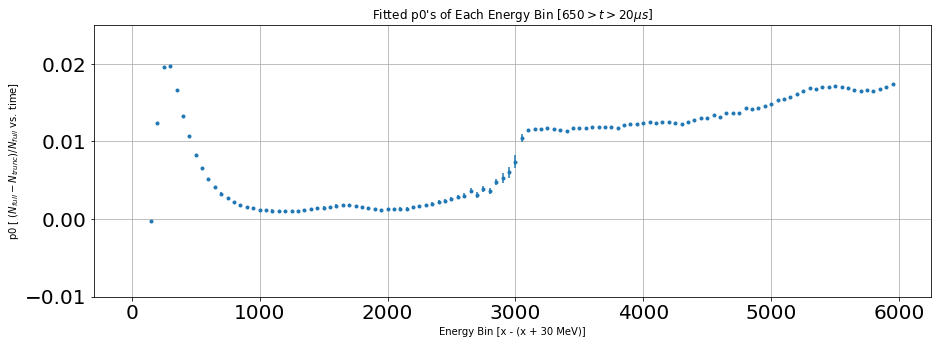

In [35]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(energies[:-1],p0s,yerr=p0es,fmt='.')
plt.title(r"Fitted p0's of Each Energy Bin [$"+str(tmax)+" > t > "+str(tmin)+" \mu s$]")
plt.xlabel("Energy Bin [x - (x + "+str(energyBin)+" MeV)]")
plt.ylabel(r"p0 [ $( N_{full} - N_{trunc} ) / N_{full}$ vs. time]")
plt.ylim(-0.01,0.025)
plt.grid()
plt.show()